In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing dataset
data = pd.read_csv("D:\lab\Dataset\cardekho_imputed.csv")

In [3]:
data.head()

,Unnamed: 0,car_name,brand,model,cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,411203,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,729500,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,1081004,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,411203,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,1196500,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [4]:
#dimensions of data
data.shape

(15411, 15)

In [5]:
#checking missing values in data
data.isna().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
cost_price           0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [6]:
#checking the null values and datatypes of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   cost_price         15411 non-null  int64  
 5   vehicle_age        15411 non-null  int64  
 6   km_driven          15411 non-null  int64  
 7   seller_type        15411 non-null  object 
 8   fuel_type          15411 non-null  object 
 9   transmission_type  15411 non-null  object 
 10  mileage            15411 non-null  float64
 11  engine             15411 non-null  int64  
 12  max_power          15411 non-null  float64
 13  seats              15411 non-null  int64  
 14  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 1.8+ MB


In [7]:
#removing unwanted columns
data = data.drop(["Unnamed: 0","mileage","max_power","model","engine","cost_price"],axis=1)
data.head()

,car_name,brand,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,seats,selling_price
0,Maruti Alto,Maruti,9,120000,Individual,Petrol,Manual,5,120000
1,Hyundai Grand,Hyundai,5,20000,Individual,Petrol,Manual,5,550000
2,Hyundai i20,Hyundai,11,60000,Individual,Petrol,Manual,5,215000
3,Maruti Alto,Maruti,9,37000,Individual,Petrol,Manual,5,226000
4,Ford Ecosport,Ford,6,30000,Dealer,Diesel,Manual,5,570000


In [8]:
#Checking for outliers in data
data.describe()

,vehicle_age,km_driven,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,5.325482,7.749711e+05
std,3.013291,5.161855e+04,0.807628,8.941284e+05
min,0.000000,1.000000e+02,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,5.000000,8.250000e+05
max,29.000000,3.800000e+06,9.000000,3.950000e+07


In [9]:
#Here, the 75%tile selling_price is around 8lacs and the maximum is around 3 crores this indicates some outliers,
#let's chck how many values lie in the selling_price>5 lacs section
outlier = data[data['selling_price']>5e6]
outlier

,car_name,brand,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,seats,selling_price
285,Land Rover Rover,Land Rover,3,13000,Dealer,Petrol,Automatic,4,7000000
311,BMW Z4,BMW,1,2000,Dealer,Petrol,Automatic,2,8250000
318,Land Rover Rover,Land Rover,3,25000,Individual,Petrol,Automatic,7,6200000
323,BMW 6,BMW,3,30000,Individual,Petrol,Automatic,4,5500000
351,BMW X5,BMW,2,19000,Individual,Diesel,Automatic,5,7900000
...,...,...,...,...,...,...,...,...,...
14701,Land Rover Rover,Land Rover,7,61000,Dealer,Diesel,Automatic,5,5700000
14707,BMW 5,BMW,1,15000,Dealer,Diesel,Automatic,5,5400000
15129,Jeep Wrangler,Jeep,2,32000,Dealer,Petrol,Automatic,5,5600000
15251,Mercedes-Benz GLS,Mercedes-Benz,3,15000,Dealer,Diesel,Automatic,7,8000000


In [10]:
#values this could cause the data to maybe fit to the wrong values and might not work with new data.
#Lets remove these rows by adding a constraint
data=data[data['selling_price']<5e6].reset_index(drop=True)
data

,car_name,brand,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,seats,selling_price
0,Maruti Alto,Maruti,9,120000,Individual,Petrol,Manual,5,120000
1,Hyundai Grand,Hyundai,5,20000,Individual,Petrol,Manual,5,550000
2,Hyundai i20,Hyundai,11,60000,Individual,Petrol,Manual,5,215000
3,Maruti Alto,Maruti,9,37000,Individual,Petrol,Manual,5,226000
4,Ford Ecosport,Ford,6,30000,Dealer,Diesel,Manual,5,570000
...,...,...,...,...,...,...,...,...,...
15282,Hyundai i10,Hyundai,9,10723,Dealer,Petrol,Manual,5,250000
15283,Maruti Ertiga,Maruti,2,18000,Dealer,Petrol,Manual,7,925000
15284,Skoda Rapid,Skoda,6,67000,Dealer,Diesel,Manual,5,425000
15285,Mahindra XUV500,Mahindra,5,3800000,Dealer,Diesel,Manual,7,1225000


In [11]:
#print total number of cars and car name
print(data[['car_name']].nunique())
print(data['car_name'].unique().tolist())

car_name    112
dtype: int64
['Maruti Alto', 'Hyundai Grand', 'Hyundai i20', 'Ford Ecosport', 'Maruti Wagon R', 'Hyundai i10', 'Hyundai Venue', 'Maruti Swift', 'Hyundai Verna', 'Renault Duster', 'Mini Cooper', 'Maruti Ciaz', 'Mercedes-Benz C-Class', 'Toyota Innova', 'Maruti Baleno', 'Maruti Swift Dzire', 'Volkswagen Vento', 'Hyundai Creta', 'Honda City', 'Mahindra Bolero', 'Toyota Fortuner', 'Renault KWID', 'Honda Amaze', 'Hyundai Santro', 'Mahindra XUV500', 'Mahindra KUV100', 'Maruti Ignis', 'Datsun RediGO', 'Mahindra Scorpio', 'Mahindra Marazzo', 'Ford Aspire', 'Ford Figo', 'Maruti Vitara', 'Tata Tiago', 'Volkswagen Polo', 'Kia Seltos', 'Maruti Celerio', 'Datsun GO', 'BMW 5', 'Honda CR-V', 'Ford Endeavour', 'Mahindra KUV', 'Honda Jazz', 'BMW 3', 'Audi A4', 'Tata Tigor', 'Maruti Ertiga', 'Tata Safari', 'Mahindra Thar', 'Tata Hexa', 'Land Rover Rover', 'Maruti Eeco', 'Audi A6', 'Mercedes-Benz E-Class', 'Audi Q7', 'Jaguar XF', 'MG Hector', 'Honda Civic', 'Isuzu D-Max', 'BMW X1', 'Skoda 

In [12]:
#printing total car brands
print(data[['brand']].nunique())
print(data['brand'].unique().tolist())

brand    27
dtype: int64
['Maruti', 'Hyundai', 'Ford', 'Renault', 'Mini', 'Mercedes-Benz', 'Toyota', 'Volkswagen', 'Honda', 'Mahindra', 'Datsun', 'Tata', 'Kia', 'BMW', 'Audi', 'Land Rover', 'Jaguar', 'MG', 'Isuzu', 'Skoda', 'Volvo', 'Lexus', 'Jeep', 'Porsche', 'Nissan', 'ISUZU', 'Force']


# EDA

In [13]:
data['seats'].value_counts()

5    12830
7     1902
8      311
6      127
9       55
4       54
2        6
0        2
Name: seats, dtype: int64

In [14]:
car_models = data.groupby('car_name')['car_name'].agg('count').sort_values(ascending=False)
car_models[:20]

car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Ford Ecosport         374
Volkswagen Polo       373
Maruti Baleno         364
Honda Amaze           362
Maruti Ciaz           346
Maruti Ertiga         343
Hyundai Creta         336
Mahindra XUV500       330
Renault KWID          306
Maruti Vitara         295
Name: car_name, dtype: int64

<AxesSubplot:>

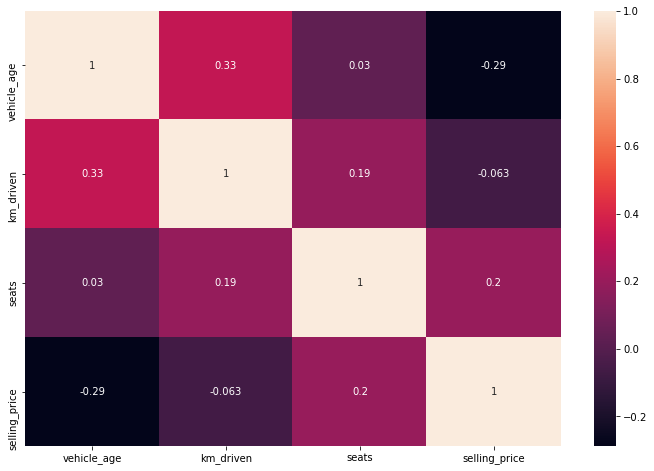

In [15]:
#heatmap to fing corelation
plt.figure(figsize=(12,8))
corr = data.corr()
sns.heatmap(corr, annot=True)

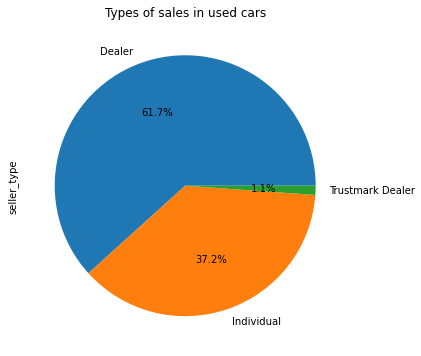

In [16]:
#Types of sales
plt.figure(figsize=(8,6))
data['seller_type'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title('Types of sales in used cars')
plt.show()

if u buy cars directly with the owners, they will be called as individual.

dealer are one who have collections of used cars.

trustmark dealers are one who will give warranty, maintenance and repair in case of any breakdown for used cars.

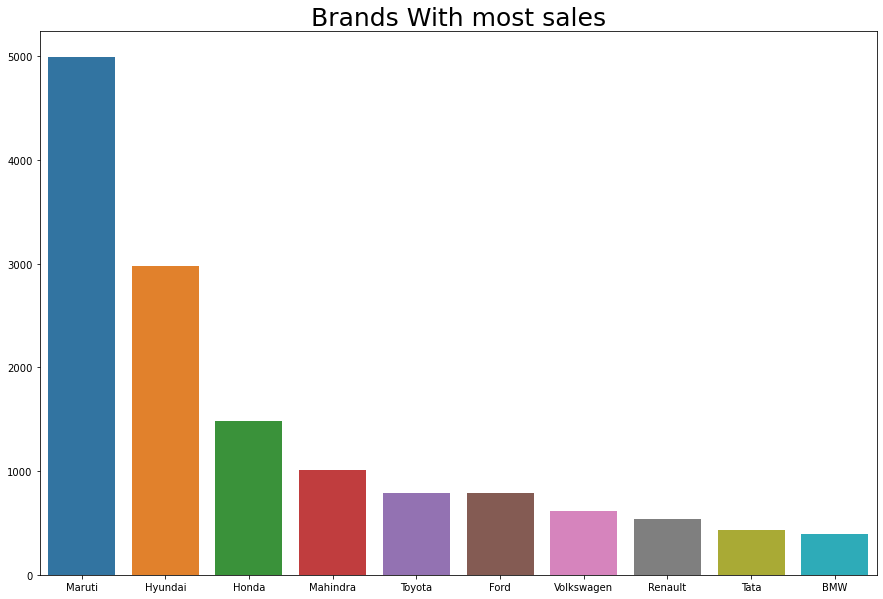

In [17]:
#brand with most sales
plt.figure(figsize=(15,10))
sns.barplot(x=data.brand.value_counts()[:10].index,y=data.brand.value_counts()[:10].values)
plt.title("Brands With most sales", fontsize=25)
plt.show()

<AxesSubplot:xlabel='transmission_type', ylabel='selling_price'>

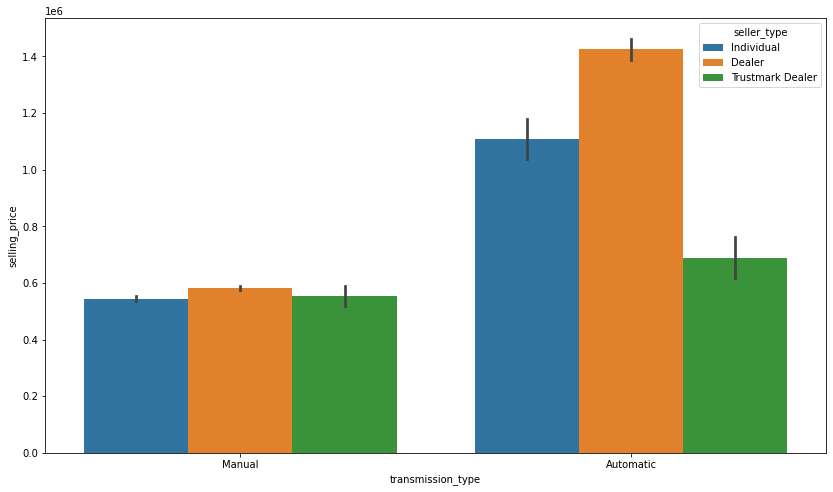

In [18]:
#selling price based on transmission type
plt.figure(figsize = (14, 8))
sns.barplot(x = "transmission_type", y = "selling_price", hue = "seller_type", data = data,)

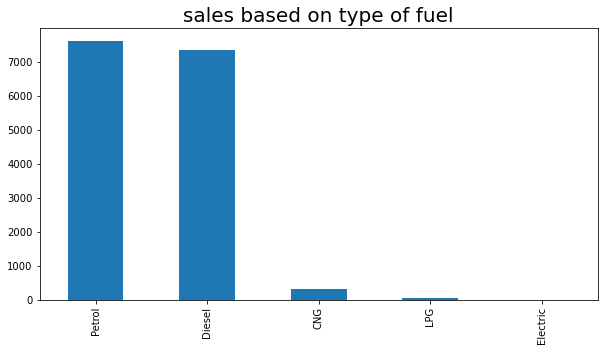

In [19]:
#sales based on fuel types
plt.figure(figsize=(20,15))
data['fuel_type'].value_counts().plot.bar(figsize=(10,5))
plt.title("sales based on type of fuel", fontsize=20)
plt.show()

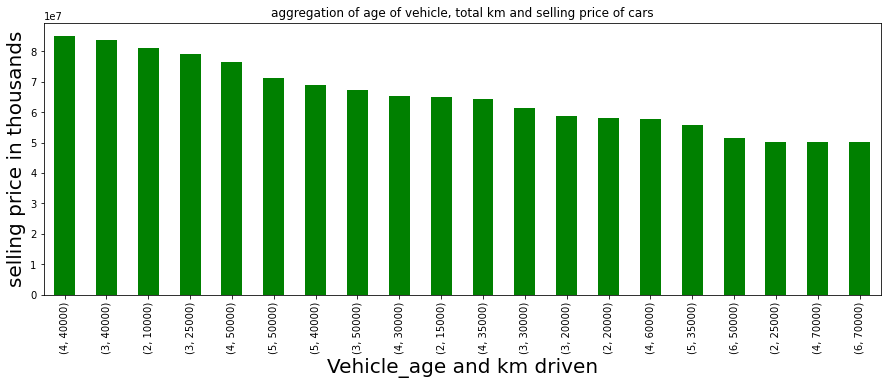

In [20]:
#aggregation of age of vehicle, total km and selling price of cars
data.groupby(['vehicle_age','km_driven'])['selling_price'].sum().sort_values(ascending = False).head(20).plot(kind='bar',color='green',figsize=(15,5))
plt.title('aggregation of age of vehicle, total km and selling price of cars', fontsize=12)
plt.xlabel('Vehicle_age and km driven',size=20)
plt.ylabel('selling price in thousands', size=20)
plt.show()

# Modelling

In [21]:
data = data.drop(["brand","fuel_type","transmission_type","seats"],axis=1)
data

,car_name,vehicle_age,km_driven,seller_type,selling_price
0,Maruti Alto,9,120000,Individual,120000
1,Hyundai Grand,5,20000,Individual,550000
2,Hyundai i20,11,60000,Individual,215000
3,Maruti Alto,9,37000,Individual,226000
4,Ford Ecosport,6,30000,Dealer,570000
...,...,...,...,...,...
15282,Hyundai i10,9,10723,Dealer,250000
15283,Maruti Ertiga,2,18000,Dealer,925000
15284,Skoda Rapid,6,67000,Dealer,425000
15285,Mahindra XUV500,5,3800000,Dealer,1225000


In [22]:
data.head()

,car_name,vehicle_age,km_driven,seller_type,selling_price
0,Maruti Alto,9,120000,Individual,120000
1,Hyundai Grand,5,20000,Individual,550000
2,Hyundai i20,11,60000,Individual,215000
3,Maruti Alto,9,37000,Individual,226000
4,Ford Ecosport,6,30000,Dealer,570000


In [23]:
# one hot encoding
dummies = pd.get_dummies(data, columns = ['car_name','seller_type'])
dummies

,vehicle_age,km_driven,selling_price,car_name_Audi A4,car_name_Audi A6,car_name_Audi A8,car_name_Audi Q7,car_name_BMW 3,car_name_BMW 5,car_name_BMW 6,...,car_name_Toyota Yaris,car_name_Volkswagen Polo,car_name_Volkswagen Vento,car_name_Volvo S90,car_name_Volvo XC,car_name_Volvo XC60,car_name_Volvo XC90,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,9,120000,120000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5,20000,550000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,11,60000,215000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,9,37000,226000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6,30000,570000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15282,9,10723,250000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15283,2,18000,925000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15284,6,67000,425000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15285,5,3800000,1225000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
data1 = pd.concat([dummies],axis='columns')
data1

,vehicle_age,km_driven,selling_price,car_name_Audi A4,car_name_Audi A6,car_name_Audi A8,car_name_Audi Q7,car_name_BMW 3,car_name_BMW 5,car_name_BMW 6,...,car_name_Toyota Yaris,car_name_Volkswagen Polo,car_name_Volkswagen Vento,car_name_Volvo S90,car_name_Volvo XC,car_name_Volvo XC60,car_name_Volvo XC90,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,9,120000,120000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5,20000,550000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,11,60000,215000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,9,37000,226000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6,30000,570000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15282,9,10723,250000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15283,2,18000,925000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15284,6,67000,425000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15285,5,3800000,1225000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
# Drop one column to avoid dummy variable trap
fdata =  data1.drop(['car_name_Volvo XC60'], axis='columns')

In [26]:
fdata.head()

,vehicle_age,km_driven,selling_price,car_name_Audi A4,car_name_Audi A6,car_name_Audi A8,car_name_Audi Q7,car_name_BMW 3,car_name_BMW 5,car_name_BMW 6,...,car_name_Toyota Innova,car_name_Toyota Yaris,car_name_Volkswagen Polo,car_name_Volkswagen Vento,car_name_Volvo S90,car_name_Volvo XC,car_name_Volvo XC90,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,9,120000,120000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5,20000,550000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,11,60000,215000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,9,37000,226000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6,30000,570000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
X = fdata.drop(['selling_price'], axis =1)
X.head()

,vehicle_age,km_driven,car_name_Audi A4,car_name_Audi A6,car_name_Audi A8,car_name_Audi Q7,car_name_BMW 3,car_name_BMW 5,car_name_BMW 6,car_name_BMW 7,...,car_name_Toyota Innova,car_name_Toyota Yaris,car_name_Volkswagen Polo,car_name_Volkswagen Vento,car_name_Volvo S90,car_name_Volvo XC,car_name_Volvo XC90,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,9,120000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5,20000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,11,60000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,9,37000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6,30000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
y=fdata.selling_price
y

0         120000
1         550000
2         215000
3         226000
4         570000
          ...   
15282     250000
15283     925000
15284     425000
15285    1225000
15286    1200000
Name: selling_price, Length: 15287, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 25, random_state = 0)

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [31]:
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred1 = lr.predict(X_test)
y_pred1

array([ 839442.07302902,  915963.7957098 ,  559367.7290165 ,
         -4881.95706801,  641451.78356124, 1446004.93356024,
        476631.35771867,  468709.39775048,  400564.92026012,
        628605.35772727,  353199.9537757 ,  596175.75843589,
       1107531.90633609,  555059.56087366,  897103.41669104,
        956782.92304741,  575013.88083102,  437424.71143404,
        762962.91292548,  352632.08395346,  756135.7872113 ,
        899620.44750624, 1156024.34350672,  388846.85078357,
        707807.07335525])

In [33]:
from sklearn.metrics import accuracy_score
lr.score(X_test,y_test)*100

82.00248051508832

In [59]:
df = pd.DataFrame({'Actual':y_test,"Predicted":y_pred1})
df.head()

,Actual,Predicted
467,600000,839442.073029
6058,900000,915963.795710
4258,595000,559367.729016
8400,100000,-4881.957068
10332,700000,641451.783561


In [60]:
#save the model
import pickle
#filename = 'LinearRegressionModel.pkl'
pickle.dump(lr, open('LRModel.pickle', 'wb'))